* Set objective function to glucose minimization
* Set upper bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 (0.30 is max Rhodotorula growth rate in lab)
* Find exchange fluxes 

In [11]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [12]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")

In [13]:
# Change glucose bounds
model.reactions.get_by_id("EX_glc__D_e").upper_bound = 9999
model.reactions.get_by_id("EX_glc__D_e").lower_bound = -9999

In [16]:
# Changing the objective function to glucose min
model.objective = "EX_glc__D_e" 
solution = model.optimize('minimize') # minimize the objective function, get solution

In [28]:
# Getting biomass compositions???


In [27]:
# Getting exchange fluxes: glucose, CO2, ammonium and other minerals, others, like glycerol ['glc__D_e', 'co2_e', 'nh4_e', 'ca2_e', 'h_e', 'h2o_e', 'o2_e', 'pi_e', 'so4_e', 'glyc_e']  
# ammonium exchange          
# D-glucose exchange       
# H+ exchange          
# iron(2+) exchange          
# oxygen exchange          
# phosphate exchange          
# potassium exchange          
# sodium exchange          
# sulphate exchange          
# water exchange          
# chloride exchange          
# Cu2(+) exchange          
# Mn(2+) exchange          
# Zn(2+) exchange          
# Mg(2+) exchange          
# Ca(2+) exchange ?


# Make a pd dataframe with all exchange fluxes that are not zero, then make a pivot table with wanted metabolites fluxes on specific growth rate
GR_range= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]

model.reactions.BIOMASS_RT.bounds = GR_range[0], GR_range[0]
solution = model.optimize('minimize')
exchange_fluxes_all = model.summary().to_frame()
exchange_fluxes_all['GR'] = GR_range[0]


for i in range(1, len(GR_range)):
    model.reactions.BIOMASS_RT.bounds = GR_range[i], GR_range[i]
    solution = model.optimize('minimize')
    model_summary = model.summary().to_frame()
    model_summary['GR'] = GR_range[i]
    exchange_fluxes_all = pd.concat([exchange_fluxes_all, model_summary], axis=0)  
    
exchange_fluxes_all = exchange_fluxes_all[(exchange_fluxes_all['flux']) != 0.0]
exchange_fluxes_all['flux'] = abs(exchange_fluxes_all['flux'])

# Get specific metabolites with their fluxes
exchange_fluxes_table = pd.pivot_table(exchange_fluxes_all[exchange_fluxes_all.metabolite.isin(['glc__D_e', 'o2_e', 'co2_e', 'nh4_e', 'ca2_e', 'h_e', 'h2o_e', 'pi_e', 'so4_e', 'glyc_e', 'cu2_e', 'fe2_e', 'fe3_e'])], 
                                       values='flux', index=['GR'], columns=['metabolite'])

exchange_fluxes_table



metabolite,ca2_e,co2_e,cu2_e,fe2_e,fe3_e,glc__D_e,h2o_e,h_e,nh4_e,o2_e,pi_e,so4_e
GR,,,,,,,,,,,,
0.05,0.000042,1.803280,0.000026,0.000214,0.000308,0.691224,2.935246,0.114391,0.330015,1.617112,0.013311,0.005012
0.10,0.000083,3.423804,0.000053,0.000428,0.000617,1.351989,5.687736,0.228782,0.660029,3.051467,0.026622,0.010024
0.15,0.000125,5.044459,0.000079,0.000643,0.000925,2.012776,8.440357,0.343173,0.990044,4.485954,0.039932,0.015036
0.20,0.000166,6.665114,0.000105,0.000857,0.001234,2.673563,11.192978,0.457564,1.320059,5.920441,0.053243,0.020048
0.25,0.000208,8.285770,0.000131,0.001071,0.001542,3.334350,13.945599,0.571955,1.650074,7.354929,0.066554,0.025060
0.30,0.000250,9.906425,0.000157,0.001285,0.001851,3.995137,16.698220,0.686346,1.980088,8.789416,0.079864,0.030071


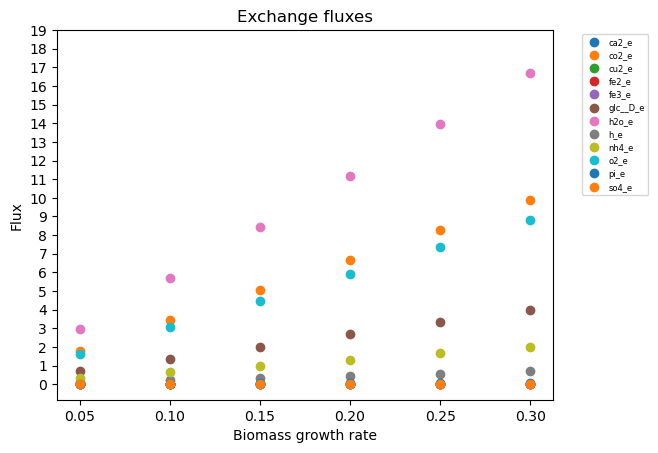

In [29]:
# Make plots for exchange reactions

plt.plot(GR_range, exchange_fluxes_table[exchange_fluxes_table.columns], 'o', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.yticks(range(0, 20, 1))
plt.show()

In [ ]:
# Export DataFrames to excel - NB! Will overwrite the pages
# with pd.ExcelWriter("C:\\Users\Maive\\Desktop\\BSc_loputoo\\Simulated_values\\sim_values.xlsx") as excel_writer:
#     PPP_enzymes_fluxes.to_excel(excel_writer, sheet_name='Sheet1', index=False)
#     ATPM_ACITL_fluxes.to_excel(excel_writer, sheet_name='Sheet2', index=False)
#     exchange_fluxes.to_excel(excel_writer, sheet_name='Sheet3', index=False)